In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATA_DIR = 'flowers' 

# Create the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Create the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Get the class names that Keras inferred from the folder names
class_names = train_dataset.class_names
print("Class names:", class_names)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.
Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


2025-09-09 16:06:04.870727: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


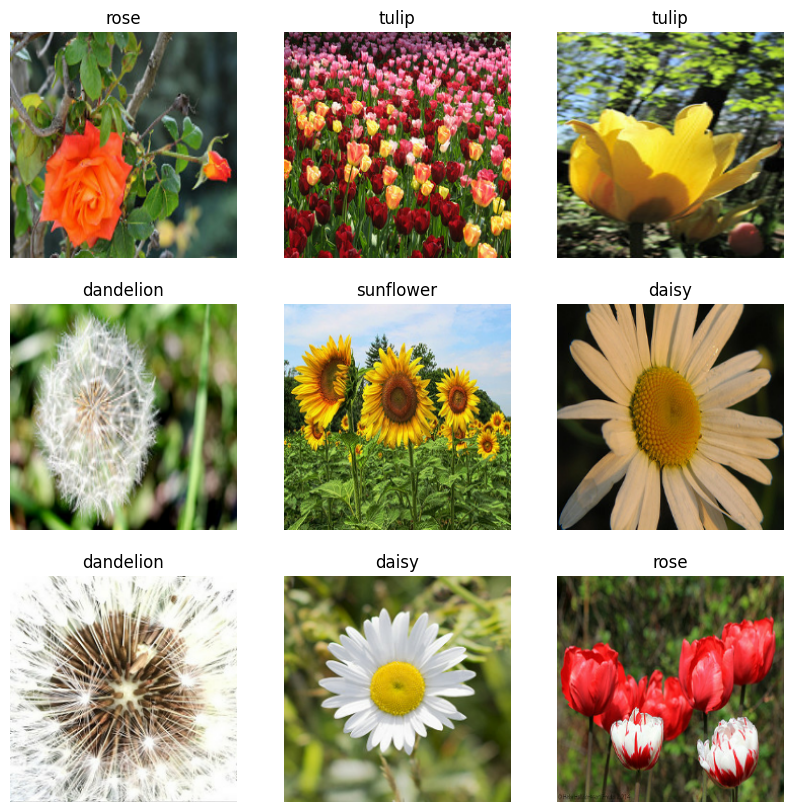

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [4]:
# Load the VGG16 model, pre-trained on the ImageNet dataset
# include_top=False removes the final classification layer
# input_shape defines the shape of our images (224x224 with 3 color channels)
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model's layers
# This prevents the pre-trained weights from being updated during our training
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 242s 4us/step


In [5]:
# Create a new model by stacking our layers on top of the base_model
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax') # len(class_names) is 5
])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,757 (80.64 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Train the model for 10 epochs
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accuracy: 0.6182 - loss: 15.6480 - val_accuracy: 0.7486 - val_loss: 1.2754
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 489s 5s/step - accuracy: 0.9039 - loss: 0.3512 - val_accuracy: 0.7949 - val_loss: 1.2714
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 529s 5s/step - accuracy: 0.9677 - loss: 0.1091 - val_accuracy: 0.8088 - val_loss: 1.3661
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 491s 5s/step - accuracy: 0.9887 - loss: 0.0403 - val_accuracy: 0.8158 - val_loss: 1.2302
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 499s 5s/step - accuracy: 0.9961 - loss: 0.0193 - val_accuracy: 0.8216 - val_loss: 1.2035
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 508s 5s/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.8204 - val_loss: 1.2927
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 527s 5s/step - accuracy: 0.9992 - loss: 0.0069 - val_accuracy: 0.8123 - val_loss: 1.2533
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 530s 5s/step - accuracy: 0.9983 - loss: 0.0044 - val_acc

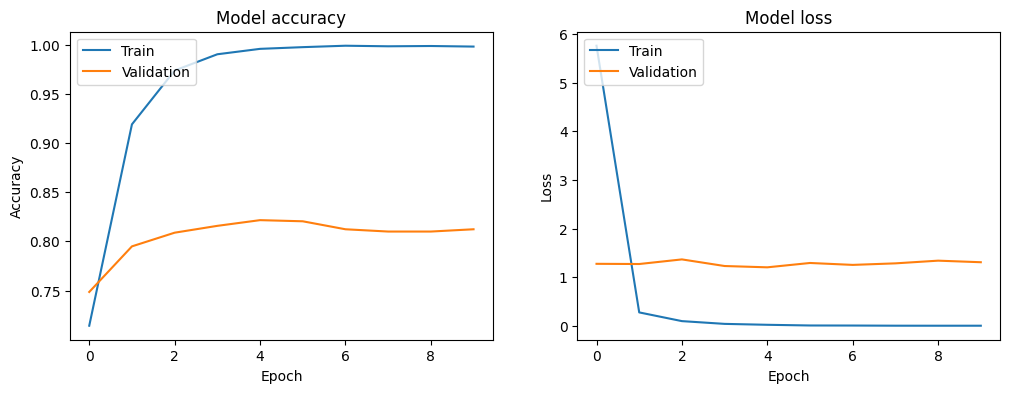

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
